Using a Neural Network to conduct Simple Linear Regression

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

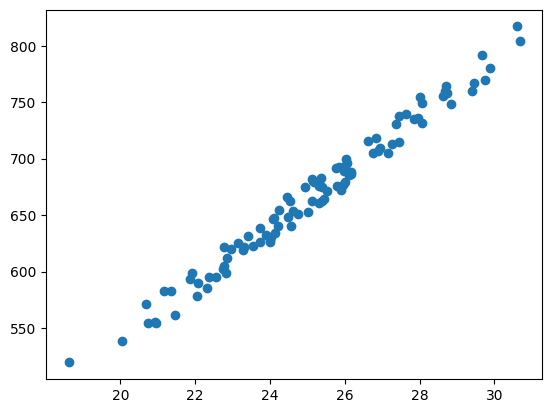

In [ ]:
#Generate random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25*area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns = ['area', 'price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [ ]:
data = (data - data.min()) / (data.max() - data.min()) #Normalize (will always be between 0 and 1)

model = K.Sequential([Dense(1, input_shape = [1,], activation = None)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(x = data['area'], y = data['price'], epochs = 150, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/150
3/3 [==============================] - 0s 79ms/step - loss: 0.0102 - val_loss: 0.0081
Epoch 2/150
3/3 [==============================] - 0s 17ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 3/150
3/3 [==============================] - 0s 18ms/step - loss: 0.0101 - val_loss: 0.0080
Epoch 4/150
3/3 [==============================] - 0s 17ms/step - loss: 0.0100 - val_loss: 0.0080
Epoch 5/150
3/3 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0080
Epoch 6/150
3/3 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0080
Epoch 7/150
3/3 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0079
Epoch 8/150
3/3 [==============================] - 0s 19ms/step - loss: 0.0099 - val_loss: 0.0079
Epoch 9/150
3/3 [==============================] - 0s 17ms/step - loss: 0.0099 - val_loss: 0.0079
Epoch 10/150
3/3 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 0.0078
Epoch 11/150
3/3 [=

4/4 [==============================] - 0s 3ms/step


[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.6769486]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.13481945], dtype=float32)>]

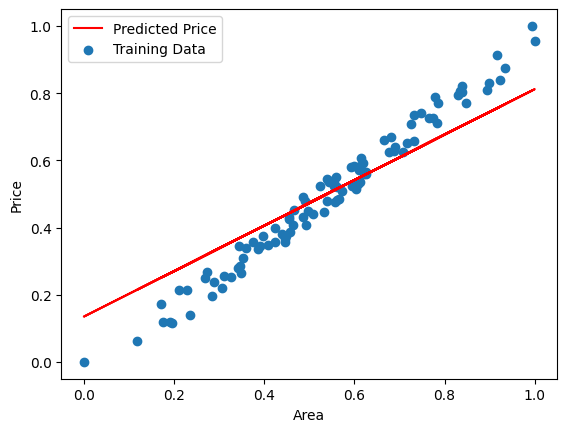

In [ ]:
y_pred = model.predict(data['area'])

plt.plot(data['area'], y_pred, color = "red", label = "Predicted Price")
plt.scatter(data['area'], data['price'], label = "Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

model.weights